<a href="https://colab.research.google.com/github/niranjana2222/Neural-Networks-and-ODE-Models/blob/main/Boundary_Condition_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

## check if GPU is available and use it; otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
#suggested neural network
N = nn.Sequential(nn.Linear(1, 50), nn.Sigmoid(), nn.Linear(50,1, bias=False))

#initial condition
A = 0.

#initial trial 
Psi_t = lambda x: A + x * N(x)

#transorming the equation with x and Psi
f = lambda x, Psi: torch.exp(-x / 5.0) * torch.cos(x) - Psi / 5.0

#loss function
def loss(x):

    x.requires_grad = True
    outputs = Psi_t(x)
    Psi_t_x = torch.autograd.grad(outputs, x, grad_outputs=torch.ones_like(outputs),
                        create_graph=True)[0]

    return  torch.mean( ( Psi_t_x - f(x, outputs) )  ** 2)

#recommended optimizer
optimizer = torch.optim.LBFGS(N.parameters())

#recommended points collected
x = torch.Tensor(np.linspace(0, 2, 100)[:, None])



In [4]:
#run optimizer
def closure():

    optimizer.zero_grad()
    l = loss(x)
    l.backward()
    
    return l

for i in range(10):
    optimizer.step(closure)

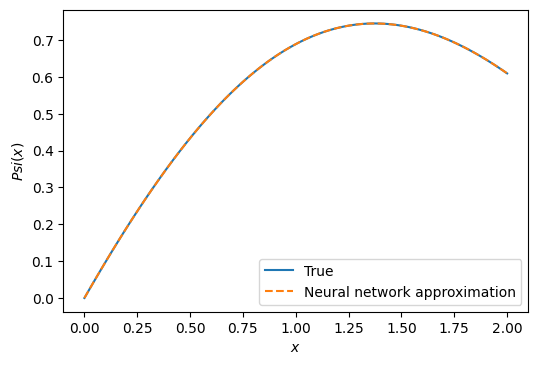

In [5]:
#compare NN to analytical solution
xx = np.linspace(0, 2, 100)[:, None]

with torch.no_grad():
    yy = Psi_t(torch.Tensor(xx)).numpy()
yt = np.exp(-xx / 5.0) * np.sin(xx)

fig, ax = plt.subplots(dpi=100)
ax.plot(xx, yt, label='True')
ax.plot(xx, yy, '--', label='Neural network approximation')
ax.set_xlabel('$x$')
ax.set_ylabel('$Psi(x)$')
plt.legend(loc='best');
